<a href="https://colab.research.google.com/github/jonathanmendoza-tx/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/Jonathan_Mendoza_LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

## Load and clean data

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['class','handicapped_infants','water_proj_costshare','adopt_budget_res',
        'physician_fee_frz','el_salvador_aid','religious_grps_in_schools',
        'anti_sat_test_ban','nicaraguan_contras_aid','mx_missle','immigration',
        'synfuels_corp_cutback','edu_spending','superfund_right_to_sue','crime',
        'duty_free_export','south_africa_export_admin_act']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',header = None , na_values = '?', names = cols)
df.fillna(value ='a', inplace = True)
print(df.shape)
df.head()

(435, 17)


,class,handicapped_infants,water_proj_costshare,adopt_budget_res,physician_fee_frz,el_salvador_aid,religious_grps_in_schools,anti_sat_test_ban,nicaraguan_contras_aid,mx_missle,immigration,synfuels_corp_cutback,edu_spending,superfund_right_to_sue,crime,duty_free_export,south_africa_export_admin_act
0,republican,n,y,n,y,y,y,n,n,n,y,a,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,a
2,democrat,a,y,y,a,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,a,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,a,y,y,y,y


In [18]:
df.replace(to_replace = {'y':1,'n':-1,'a':0}, inplace = True)
df.head()

,class,handicapped_infants,water_proj_costshare,adopt_budget_res,physician_fee_frz,el_salvador_aid,religious_grps_in_schools,anti_sat_test_ban,nicaraguan_contras_aid,mx_missle,immigration,synfuels_corp_cutback,edu_spending,superfund_right_to_sue,crime,duty_free_export,south_africa_export_admin_act
0,republican,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
2,democrat,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,democrat,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,democrat,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1


## Explore

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
class                            435 non-null object
handicapped_infants              435 non-null int64
water_proj_costshare             435 non-null int64
adopt_budget_res                 435 non-null int64
physician_fee_frz                435 non-null int64
el_salvador_aid                  435 non-null int64
religious_grps_in_schools        435 non-null int64
anti_sat_test_ban                435 non-null int64
nicaraguan_contras_aid           435 non-null int64
mx_missle                        435 non-null int64
immigration                      435 non-null int64
synfuels_corp_cutback            435 non-null int64
edu_spending                     435 non-null int64
superfund_right_to_sue           435 non-null int64
crime                            435 non-null int64
duty_free_export                 435 non-null int64
south_africa_export_admin_act    435 non-null int64
dtypes: in

In [4]:
df['class'].value_counts()

democrat      267
republican    168
Name: class, dtype: int64

In [5]:
votes = df.groupby('class').sum().T.sort_values(by = 'democrat', ascending = False)
votes

class,democrat,republican
adopt_budget_res,202,-120
nicaraguan_contras_aid,173,-109
south_africa_export_admin_act,161,46
anti_sat_test_ban,141,-84
mx_missle,128,-127
duty_free_export,69,-128
handicapped_infants,54,-103
synfuels_corp_cutback,3,-117
water_proj_costshare,1,2
religious_grps_in_schools,-12,132


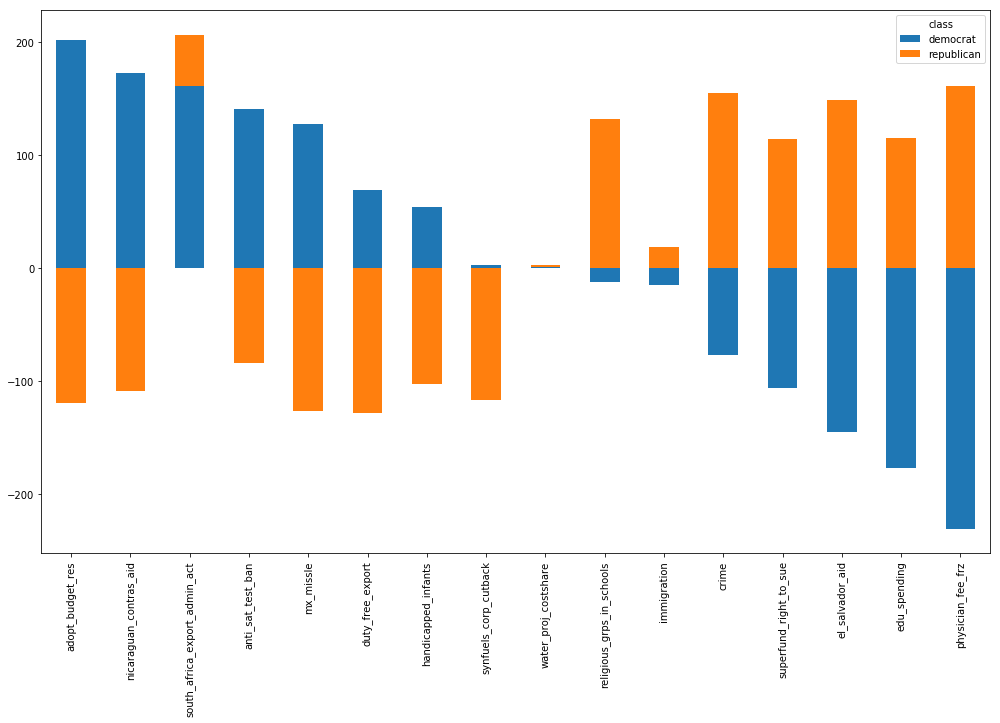

In [7]:
votes.plot.bar(figsize = (17,10), stacked = True)

## Issue democrats support more than republicans

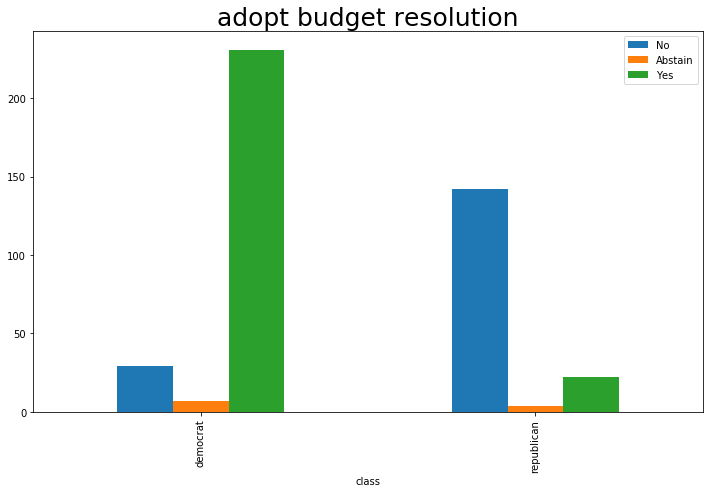

In [22]:
adopt = pd.crosstab(df['class'],df['adopt_budget_res'])
adopt.plot(kind = 'bar', figsize = (12,7))
plt.title('adopt budget resolution', fontsize = 25)
plt.legend(labels = ['No','Abstain','Yes'])

### Test Hypothesis

In [33]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

democrat_budget = df[df['class']=='democrat']['adopt_budget_res']
republican_budget = df[df['class']=='republican']['adopt_budget_res']

tstat, pvalue = ttest_ind(democrat_budget, republican_budget, equal_var = False)
print(tstat)
print(pvalue)

22.4316868913208
1.0895246138864557e-68


This p-value shows that we can reject the null hypothesis of an equal average vote between republican and democrats on the issue of budget resolution. Democrats have a significant probability of voting 'Yes' while republicans would vote 'No'.

## Issue republicans support more than democrats

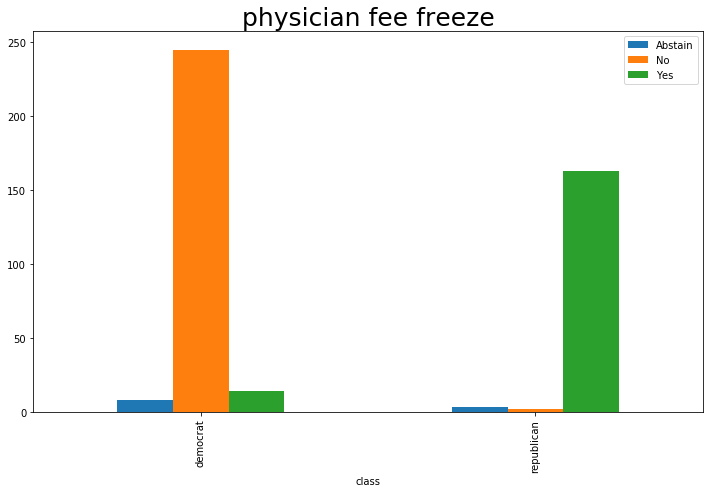

In [0]:
phys = pd.crosstab(df['class'],df['physician_fee_frz'])
phys.plot(kind = 'bar', figsize = (12,7))
plt.title('physician fee freeze', fontsize = 25)
plt.legend()

### Test Hypothesis

In [32]:
democrat_phys = df[df['class']=='democrat']['physician_fee_frz']
republican_phys = df[df['class']=='republican']['physician_fee_frz']

tstat, pvalue = ttest_ind(republican_phys,democrat_phys, equal_var = False)
print(tstat)
print(pvalue)

52.32559778411111
4.570160514553809e-187


This p-value shows that we can reject the null hypothesis of an equal average vote between republican and democrats on the issue of the physician fee freeze. Republicans have a significant probability of voting 'Yes' while democrats would vote 'No'.

##Issue both sides are conflicted on

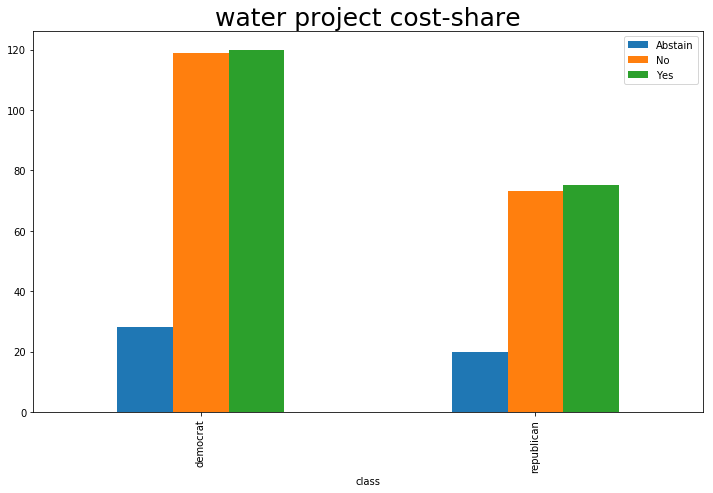

In [0]:
water = pd.crosstab(df['class'],df['water_proj_costshare'])
water.plot(kind = 'bar', figsize = (12,7))
plt.title('water project cost-share', fontsize = 25)
plt.legend()

### Test Hypothesis

In [31]:
democrat_water = df[df['class']=='democrat']['water_proj_costshare']
republican_water = df[df['class']=='republican']['water_proj_costshare']

tstat, pvalue = ttest_ind(democrat_water,republican_water, equal_var = False)
print(tstat)
print(pvalue)

-0.08778459765766038
0.9300971167247924


This p-value shows that we fail to reject the null hypothesis of equal average vote for the issue of water project cost-share.
Democrats and republicans are equally likely to vote either 'Yes' or 'No'.